In [1]:
from surprise import KNNBasic, KNNWithMeans, KNNBaseline
from surprise import Dataset
from surprise import Reader
from surprise import NMF
import pandas as pd

from surprise import SVD
from surprise import evaluate, print_perf
from surprise.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt

#------------------------load data from a file
file_path = "data/ratings.csv"
ratings = pd.read_csv(file_path, sep=",")
reader = Reader()
ratings.drop("timestamp", axis=1, inplace=True)
data = Dataset.load_from_df(ratings, reader=reader)

#########---------------SVD
# print('')
# print('---------------SVD result-------------')

nmf_rmse = []
svd_rmse = []
# ks = [10, 20, 50, 100, 200]
i = 0
regs = [0.01, 0.02, 0.05, 0.1]

while i < 4:
    algo = SVD(n_factors=10, reg_all=regs[i], lr_all=0.005)
    perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    rmse = np.sum(perf['test_rmse'])/perf['test_rmse'].size
    svd_rmse.append(rmse)
    
    algo = NMF(n_factors=25, reg_pu=regs[i], reg_qi=regs[i])
    perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    rmse = np.sum(perf['test_rmse'])/perf['test_rmse'].size
    nmf_rmse.append(rmse)
    i += 1



Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8683  0.8764  0.8738  0.8694  0.8674  0.8711  0.0034  
MAE (testset)     0.6662  0.6738  0.6673  0.6722  0.6676  0.6694  0.0030  
Fit time          2.04    2.15    1.74    1.84    1.78    1.91    0.16    
Test time         0.18    0.13    0.15    0.13    0.14    0.14    0.02    
Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.4605  1.4806  1.4702  1.4765  1.4611  1.4698  0.0081  
MAE (testset)     1.1705  1.1901  1.1846  1.1857  1.1719  1.1806  0.0079  
Fit time          7.74    7.50    8.12    7.50    7.33    7.64    0.27    
Test time         0.11    0.11    0.17    0.16    0.15    0.14    0.02    
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset

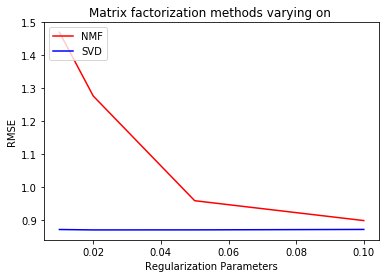

In [2]:
plt.plot(regs, nmf_rmse, 'r', label='NMF')
plt.plot(regs, svd_rmse, 'b', label='SVD')
plt.xlabel("Regularization Parameters")
plt.ylabel("RMSE")
plt.legend(loc='upper left')
plt.title("Matrix factorization methods varying on ")
plt.show()